In [ ]:
#OK

In [1]:
using Plots
using DifferentialEquations
using JuliaMBD
using JuliaMBD.Diagram



using DifferentialEquations
using Plots
using CSV
using DataFrames
using LookupTable
using .JuliaMBD
using .JuliaMBD.Diagram

In [ ]:
@model rd_pnt begin
    df = CSV.read("road_surface.csv", DataFrame)
    @parameter begin
        kmph2mps = 0.27778
        I_wheelbase=41
        vel_car_kmph=42
        end_of_road_surface=43
    end
    @xmlmodel("METI_Vertical_Vibration.drawio", "2RD_PNT")
end

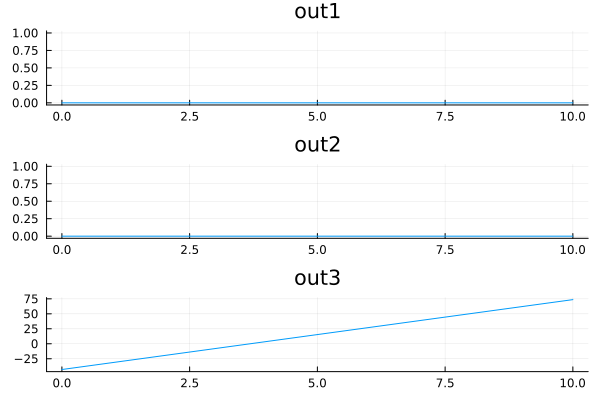

In [12]:
#OneDのy,breaksのdfを変更
@model TestRd_pnt begin
    @block begin
        m = rd_pnt()
    end
    @scope begin
        m.v_RD2TR_R_mps => out1
        m.v_RD2TR_F_mps => out2
        m.outstop => out3
    end
end

m = @compile_derivative TestRd_pnt() #１つでも微分ブロックがあるなら@compile_derivativeを書き足す,この場合はmatlabの結果と異なる場合がある
res = simulate(m, tspan=[0, 10])
plot(res)